Завантаження даних

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/yulu_rental.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Трансформації

In [3]:
# Для time intelligence

df['datetime'] = pd.to_datetime(df.datetime)
df['date'] = df.datetime.dt.date
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['dayofweek'] = df.datetime.dt.day_of_week
df['day'] = df.datetime.dt.day

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,dayofweek,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,5,1


In [5]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date                  object
year                   int32
month                  int32
dayofweek              int32
day                    int32
dtype: object

Запитання 1. Якою є середня температура в по місяцях і сезонах в Індії? Про що результати графіків можуть нам сказати?

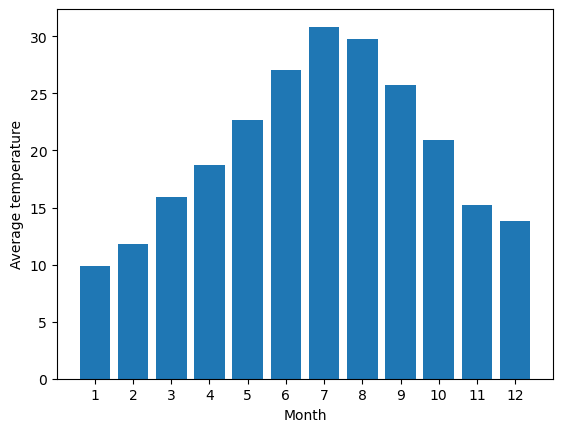

In [6]:
df_month_temp_mean = df[['month', 'temp']].groupby('month').mean().reset_index()
plt.bar(df_month_temp_mean['month'].astype(str), df_month_temp_mean['temp'])
plt.xlabel('Month')
plt.ylabel('Average temperature')
plt.show();

In [7]:
# тут ми бачимо, що сезони в Індії визначаються інакше, зимою в Індії середня температура вища, ніж весною
# через розташування у Південній півкулі і особливість клімату.
df[['month', 'season']].drop_duplicates(['season', 'month']).set_index('month')

,season
month,
1,1
2,1
3,1
4,2
5,2
6,2
7,3
8,3
9,3


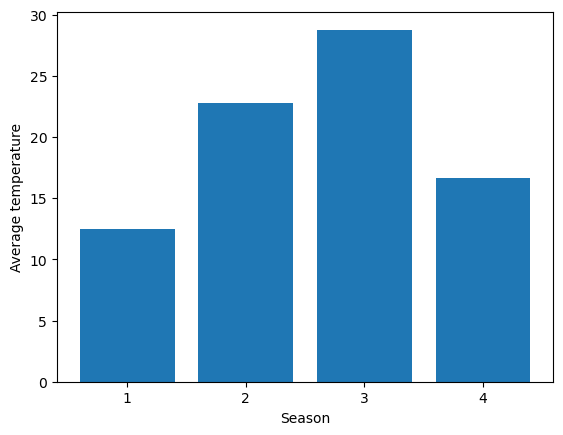

In [8]:
df_season_temp_mean = df[['season', 'temp']].groupby('season').mean().reset_index()
plt.bar(df_season_temp_mean['season'].astype(str), df_season_temp_mean['temp'])
plt.xlabel('Season')
plt.ylabel('Average temperature')
plt.show();

Дані стовпчаті діаграми показують нам, що найспритливішими сезонами з огляду на середню температуру в градусах Цельсія для користування орендованими велосипедами є осінь і літо, меншою мірою зима. Зима в Індії є теплішою з огляну на географічне розташування (Південна півкуля) і клімат.

Запитання 2. Зобразити порівняння загальної кількості користувачів, зареєстрованих і неформальних за допомогою по роках, місяцях і роках, а на наступному графіку - по сезонах і роках. Який висновок можна з цього зробити?

<Axes: xlabel='year'>

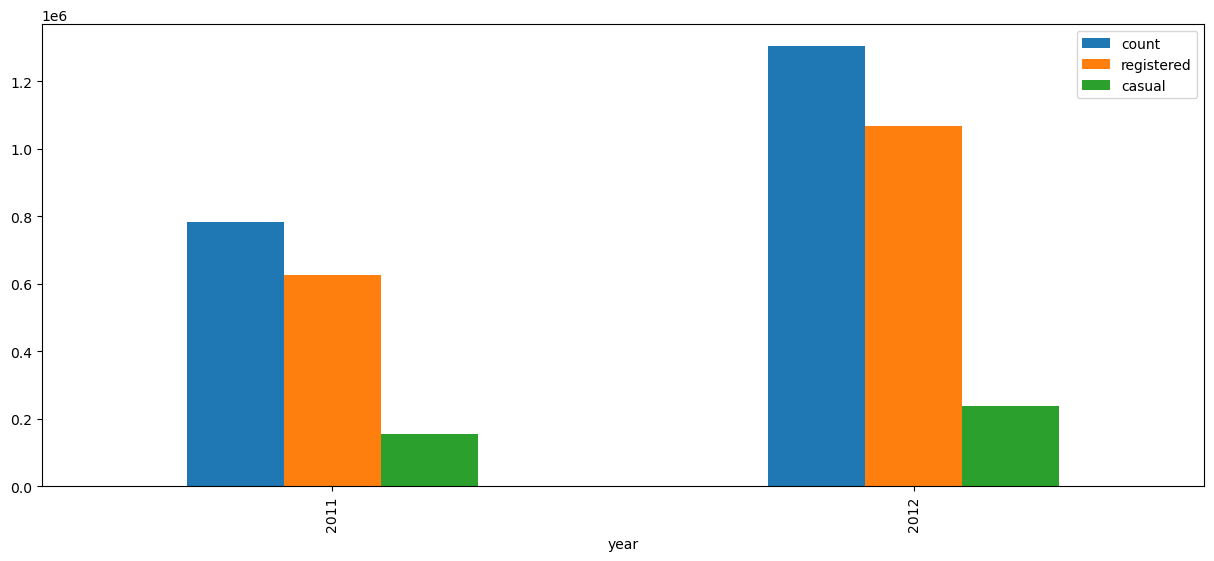

In [9]:
df[['year', 'count', 'registered', 'casual']].groupby('year').sum().plot.bar(figsize=(15,6))

<Axes: xlabel='year,month'>

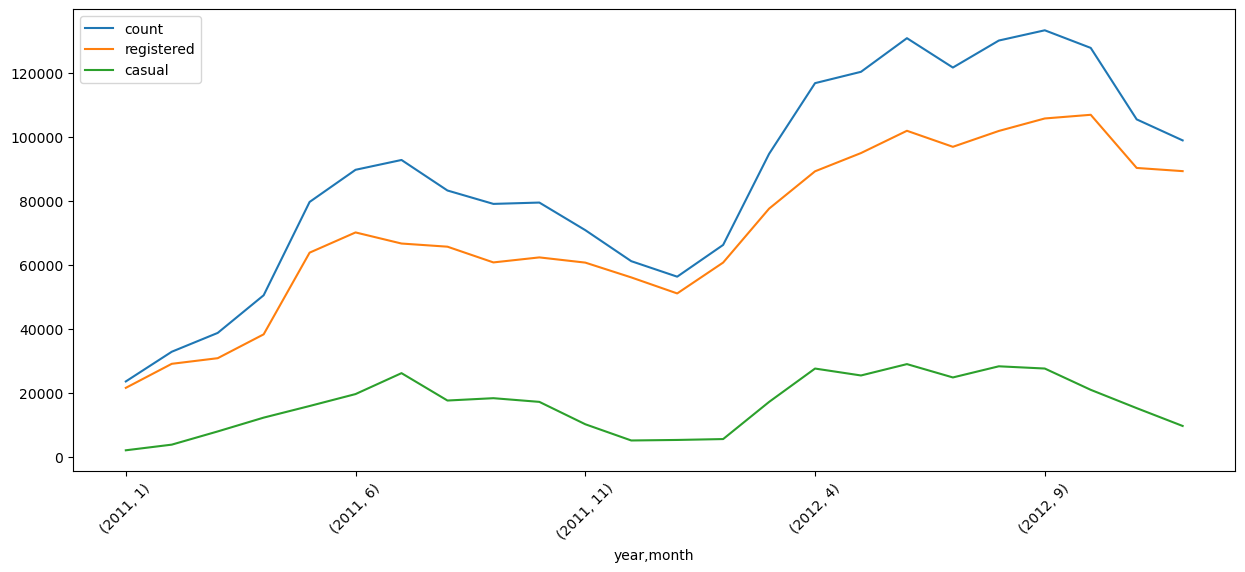

In [10]:
df[['year', 'month', 'count', 'registered', 'casual']].groupby(['year', 'month']).sum().plot(figsize=(15,6), rot=45)

<Axes: xlabel='date'>

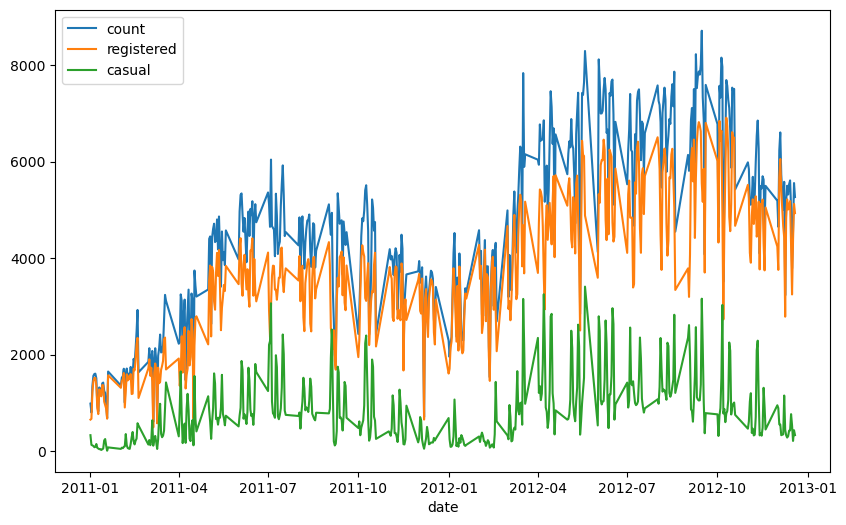

In [11]:
df[['date', 'count', 'registered', 'casual']].groupby('date').sum().plot(figsize=(10,6))

<Axes: xlabel='year,season'>

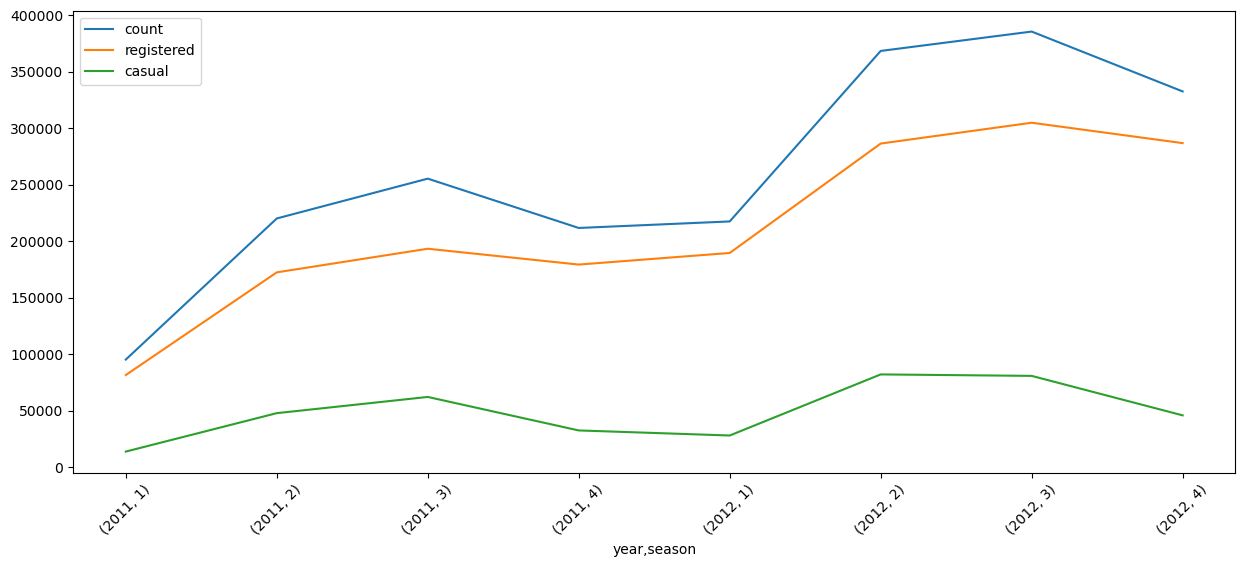

In [12]:
df[['year', 'season', 'count', 'registered', 'casual']].groupby(['year', 'season']).sum().plot(figsize=(15,6), rot=45)

З огляду на стовпчаті діаграми вище можна сказати, що рік що в 2012 році сервіс прокату велосипедів користувався більшою популярністю, ніж в 2011 році для обох груп користувачів (зареєстровані і неформальні) - споглядається теж співзалежність - разом зі зростом кількості зареєстрованих користувачів росте й кількість неформальних, те саме у випадку сезонного спаду. Активність зареєстрованих і неформальних користувачів також проглядається відповідно до сезону.

Запитання 3. Дослідити поведінку неформальних користувачів - в які дні найбільше користуються і якою ж взаємодія зареєстрованих і неформальних користувачів з точки зору робочих / неробочих днів?

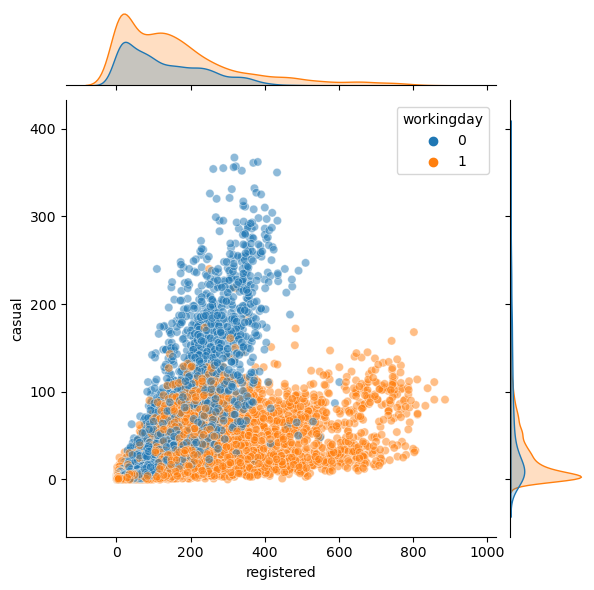

In [13]:
sns.jointplot(data=df, x='registered', y='casual', hue='workingday', alpha=0.5);

In [14]:
df.groupby('workingday')[['casual', 'registered', 'count']].sum()

,casual,registered,count
workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


In [15]:
df.groupby(['month', 'workingday']).agg({
                                            'temp':'mean',
                                            'casual':'sum',
                                            'count':'sum',
                                            'registered':'sum'
                                        })

temp  casual   count  registered
month workingday                                       
1     0           10.416946    4607   26312       21705
      1            9.489636    2645   53572       50927
2     0           11.046616    4691   23808       19117
      1           12.108495    4606   75305       70699
3     0           16.120383   13538   40594       27056
      1           15.813188   11518   92907       81389
4     0           18.689167   21605   57545       35940
      1           18.733635   18208  109857       91649
5     0           22.731083   19470   55443       35973
      1           22.653720   21815  144704      122889
6     0           27.142569   26014   74074       48060
      1           27.028462   22560  146659      124099
7     0           30.928718   26615   72699       46084
      1           30.796467   24332  141918      117586
8     0           29.075833   18177   53594       35417
      1           29.972708   27693  159922      132229
9     0           26.296131   28245   80185       51940
      1           25.475812   17656  132344      114688
10    0           19.429444   19907   62343       42436
      1           21.629310   18180  145091      126911
11    0           15.004423   15712   62590       46878
      1           15.280200    9641  113850      104209
12    0           12.712847    7456   45685       38229
      1           14.347372    7244  114475      107231

З даної мапи розсіювання, як і з понижчого датафрейму випливає очікуваний результат - в основному оренда велосипедів користується більшим попитом у робочі дні серед зареєстрованих користувачів, що пов'язано із певною регулярністю використання для доїзду на роботу / з роботи, або студентами / учнями на навчання. Проте більше неформальних користувачів орендують велосипеди у вихідні дні, коли загальна кількість орендованих велосипедів є значно меншою - можливо це пов'язано з більшою кількістю велопрогулок на вихідні дні з хорошою погодою і не мають характер регулярних.